C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation in inches for the input is: [[0.24962407]]
*** There will be Rain & Thunderstorm ***
the precipitation trend graph: 


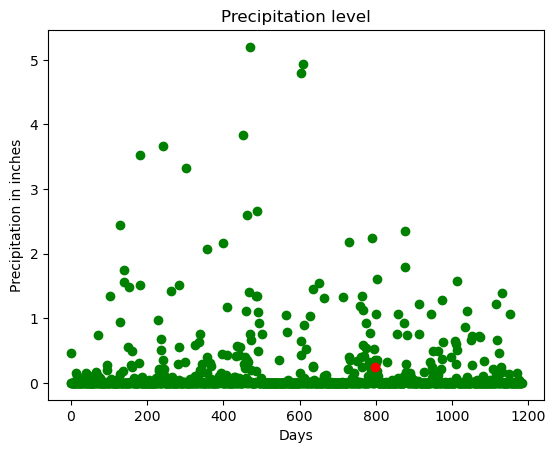

Precipitation vs selected attributes graph: 


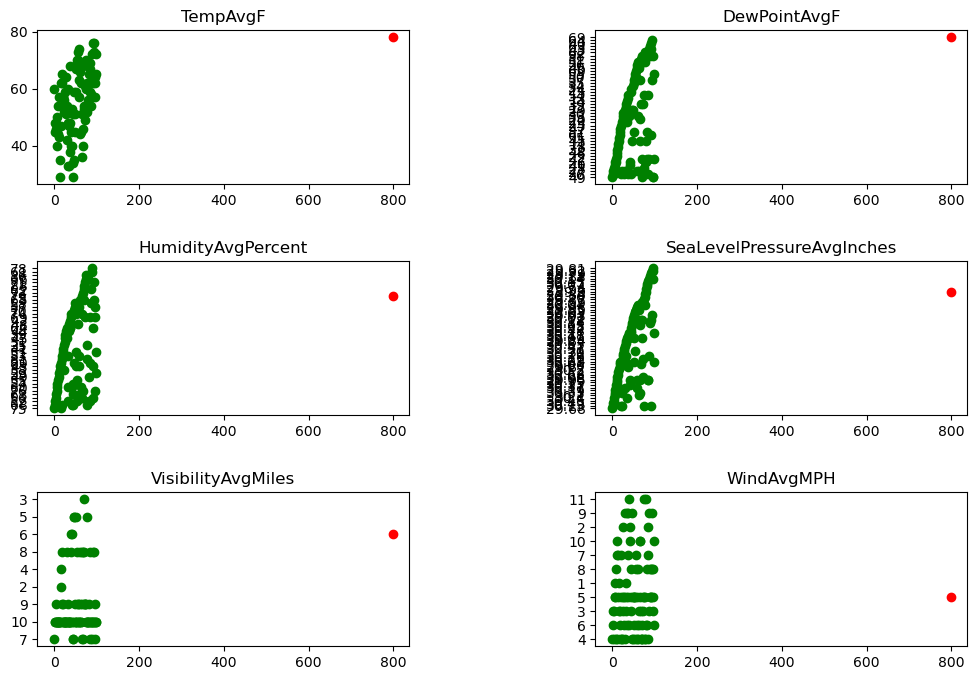

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read the cleaned data
data = pd.read_csv("austin_weather.csv")
data = data.drop(['Date'], axis=1)
data = data.drop(['Events'], axis=1)
data = data.replace('-', np.nan)
data=data.replace('T',np.nan)

data = data.dropna()


X = data.drop(['PrecipitationSumInches'], axis=1)

# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

# consider a random day in the dataset

day_index = 798
days = [i for i in range(Y.size)]

# initialize a linear regression classifier
clf = LinearRegression()

clf.fit(X, Y)

# give a sample input to test our model

inp = np.array([[73], [58], [43], [69], [46], [32], [90], [65],
				[39], [30.27],[29.28], [29.67], [10], [8], [0], [22], [10], [38]])
inp = inp.reshape(1, -1)

# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))
t = float(clf.predict(inp)[0])
#print(t)
if t >= 1.0:
    print("*** There will be Fog, Rain & Thunderstorm ***")
elif t > 0.03:
    print("*** There will be Rain & Thunderstorm ***")
elif t > 0:
    print("*** It's a Rainy day ***")
elif t == 0:
    print("*** It's a Normal day ***")
else:
    print("*** It's a Normal day ***")

# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y.tolist(), color='g')  # Convert Y to a list
plt.scatter(days[day_index], clf.predict(inp), color='r')  # Extract the value from the array

plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
				'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
				'WindAvgMPH'], axis=1)

# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends

print("Precipitation vs selected attributes graph: ")
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(x_vis.columns.size):
    plt.subplot(3, 2, i + 1)
    column_values = x_vis[x_vis.columns[i]].to_numpy()
    if len(column_values) >= 100:  # Check if the array is long enough
        plt.scatter(days[:100], column_values[:100], color='g')  # Use the first 100 values
        plt.scatter(days[day_index], column_values[day_index], color='r')
    else:
        plt.scatter(days[:len(column_values)], column_values, color='g')  # Use all available values
        plt.scatter(days[day_index], column_values[day_index], color='r')

    plt.title(x_vis.columns[i])

plt.show()

